# KMT2D / Kabuki Syndrome 1 due to KMT2D deficiency 
##### OMIM: 147920, MONDO:0007843


https://omim.org/entry/147920 


##### Clinical Synopsis (USIDNET2024)

Typical facial abnormalities, cleft or high arched palate, skeletal abnormalities, 
short stature, intellectual disability, congenital heart defects, recurrent 
infections (otitis media, pneumonia) in 50% of patients. Autoimmunity may be present
- Group: Combined immunodeficiencies with associated or syndromic features
- Subgroup: Other Combined immunodeficiencies wwith syndromic features 

##### Genotype Phenotype Correlations

- [Banka et al (2012)](https://pubmed.ncbi.nlm.nih.gov/22126750/): 
    - KABUK1 patients were more likely to have feeding problems, kidney anomalies, early breast bud development, joint dislocations, and palatal malformations in comparison with MLL2 mutation-negative patients
    - Systematic Kabuki syndrome facial morphology study suggested that nearly all patients with typical Kabuki syndrome facial features have pathogenic MLL2 mutations, although the disorder can be phenotypically variable.

- [Miyake et al (2013)](https://pubmed.ncbi.nlm.nih.gov/23913813/)
    - screened 81 patients with Kabuki syndrome for mutations in the MLL2 and KDM6A genes and identified MLL2 mutations in 50 (61.7%) and KDM6A mutations in 5 (6.2%)
    - Patients with MLL2 truncating mutations (70%) had facies that were more typical of those seen in the patients originally reported with Kabuki syndrome. High-arched eyebrows, short fifth fingers, and infantile hypotonia were more commonly seen in patients with MLL2 mutations than in those with KDM6A mutations.
    - Only half of the patients with MLL2 mutations had short stature and postnatal growth retardation, compared to all of the patients with KDM6A mutations. 
    
##### Molecular Genetics 

- [Li et al. (2011)](https://pubmed.ncbi.nlm.nih.gov/21607748/): compared frequencies of clinical symptoms in MLL2 mutation carriers versus noncarriers. MLL2 mutation carriers more often presented with short stature and renal anomalies (p = 0.026 and 0.031, respectively), and in addition, MLL2 showed a more typical facial gestalt (17 of 19) compared with noncarriers (9 of 15), although this result was not statistically significant (p = 0.1)"

- [Hannibal et al (2011)](https://pubmed.ncbi.nlm.nih.gov/21671394/): Mutations occurred throughout the gene, but were particularly common in exons 39 and 48. The clinical features of those with or without mutations were similar, except for renal anomalies, which occurred in 47% of mutation carriers compared to 14% of those who did not have a mutation. The clinical features of those with or without mutations were similar, except for renal anomalies, which occurred in 47% of mutation carriers compared to 14% of those who did not have a mutation.

In [6]:
cohort_name = 'KMT2D'
tx_id = 'NM_003482.4'
px_id = 'NP_003473.3' 

In [7]:
import hpotk
store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()

In [8]:
from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.18') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

In [9]:
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)

Individuals Processed: 100%|██████████| 65/65 [01:42<00:00,  1.57s/individuals]


In [10]:
validation.summarize()  

Validated under none policy
Showing errors and warnings
Phenopackets
  patient #46
    phenotype-features
     warnings:
     ·#3 HP:0000368 is an obsolete identifier for Posteriorly rotated ears. Replace HP:0000368 with the primary term ID HP:0000358


In [11]:
from IPython.display import HTML, display

from gpsea.view import CohortViewable
viewer = CohortViewable(hpo)
report = viewer.process(cohort=cohort, transcript_id=tx_id)
display(HTML(report))

HPO Term,ID,Seen in n individuals
Depressed nasal tip,HP:0000437,36
Prominent fingertip pads,HP:0001212,30
Global developmental delay,HP:0001263,30
Long palpebral fissure,HP:0000637,25
Macrotia,HP:0000400,24
Highly arched eyebrow,HP:0002553,22
Intellectual disability,HP:0001249,21
Eversion of lateral third of lower eyelids,HP:0007655,18
Cleft palate,HP:0000175,17
Hearing impairment,HP:0000365,16


In [12]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_protein_metadata_service()
tx_coordinates = txc_service.fetch(tx_id)
protein_meta = pms.annotate(px_id)

/var/folders/wf/3t934whj4b99bql00wxk8c2c0000gn/T/ipykernel_24264/1016008082.py:4: DeprecationWarning: Use `configure_default_protein_metadata_service` instead
  pms = configure_protein_metadata_service()


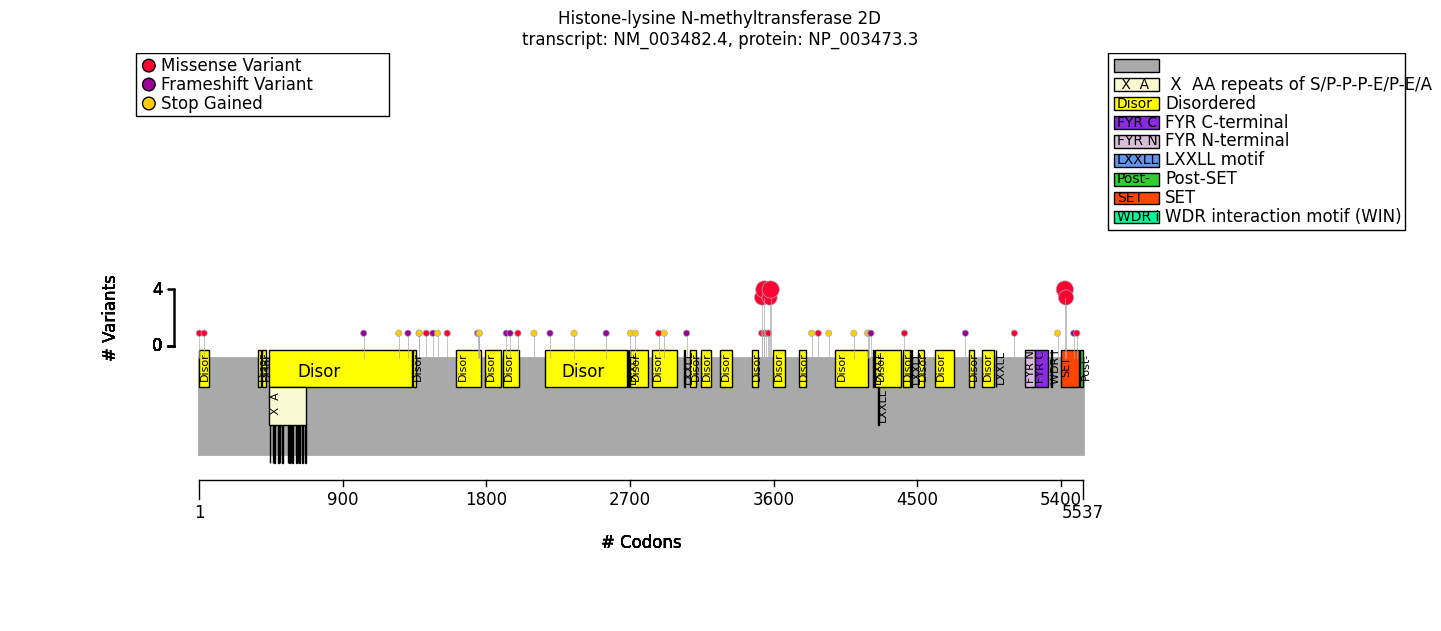

In [13]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

In [14]:
from gpsea.view import CohortVariantViewer
viewer = CohortVariantViewer(tx_id=tx_id)
report = viewer.process(cohort=cohort)
display(HTML(report))

Variant key,Variant (cDNA),Variant (protein),Effects,Count
12_49022655_49022655_C_T,c.16273G>A,p.Glu5425Lys,missense,4
12_49034182_49034182_A_G,c.10625T>C,p.Leu3542Pro,missense,4
12_49034082_49034082_C_G,c.10725G>C,p.Gln3575His,missense,3
12_49033960_49033960_C_T,c.10745G>A,p.Arg3582Gln,missense,3
12_49034225_49034225_G_C,c.10582C>G,p.Leu3528Val,missense,3
12_49022634_49022634_G_A,c.16294C>T,p.Arg5432Trp,missense,2
12_49055320_49055320_T_C,c.5A>G,p.Asp2Gly,missense,1
12_49050492_49050493_CA_C,c.3095del,p.Leu1032ArgfsTer24,frameshift,1
12_49026640_49026640_C_A,c.15326G>T,p.Cys5109Phe,missense,1
12_49022121_49022122_AC_A,c.16442del,p.Cys5481LeufsTer6,frameshift,1


## Predicates

#### Frameshift vs Missense

In [43]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
gt_predicate = monoallelic_predicate(
    a_predicate=VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id),
    b_predicate=VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id),
    names=('Missense', 'Frameshift')
)

gt_predicate.display_question()

'Allele group: Missense, Frameshift'

In [17]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
    min_n_of_patients_with_term=2,
)

In [18]:
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05

In [19]:
from gpsea.analysis.pcats.stats import FisherExactTest
count_statistic = FisherExactTest()

In [20]:
from gpsea.analysis.pcats import HpoTermAnalysis
analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)

In [21]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
result.total_tests

48

In [22]:
len(result.phenotypes)

382

In [32]:
from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_report = mtc_viewer.process(result)
HTML(mtc_report)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,15
HMF02,Skipping term because no genotype has more than one observed HPO count,5
HMF04,Skipping term because all genotypes have same HPO observed proportions,78
HMF05,Skipping term because one genotype had zero observations,10
HMF06,Skipping term with less than 7 observations (not powered for 2x2),134
HMF08,Skipping general term,92


In [41]:
from gpsea.view import summarize_hpo_analysis
summary_df = summarize_hpo_analysis(hpo, result)
summary_df.to_csv('/Users/adam/Documents/git/gpsea-cs/notebooks/KMT2D/KMT2D_frameshift_vs_missense.csv')  
summary_df

Allele group                                       Missense          \
                                                      Count Percent   
Hearing impairment [HP:0000365]                       14/19     74%   
Sensorineural hearing impairment [HP:0000407]          6/11     55%   
Ventricular septal defect [HP:0001629]                 0/15      0%   
Patent ductus arteriosus [HP:0001643]                  1/24      4%   
High forehead [HP:0000348]                              5/6     83%   
Long palpebral fissure [HP:0000637]                     8/8    100%   
Patent foramen ovale [HP:0001655]                      2/24      8%   
Sacral dimple [HP:0000960]                              0/2      0%   
Highly arched eyebrow [HP:0002553]                      8/9     89%   
Ptosis [HP:0000508]                                     0/7      0%   
Recurrent otitis media [HP:0000403]                    8/15     53%   
Sparse lateral eyebrow [HP:0005338]                     6/7     86%   
Microcephaly [HP:0000252]                               3/7     43%   
Blue sclerae [HP:0000592]                               4/7     57%   
Decreased proportion of CD4-positive, alpha-bet...      6/8     75%   
Motor delay [HP:0001270]                                2/8     25%   
Decreased circulating IgA concentration [HP:000...      2/8     25%   
Short stature [HP:0004322]                             9/13     69%   
Prominent fingertip pads [HP:0001212]                 12/15     80%   
Proportionate short stature [HP:0003508]               7/11     64%   
Severe short stature [HP:0003510]                      7/12     58%   
Wide nasal bridge [HP:0000431]                          3/3    100%   
Seizure [HP:0001250]                                    2/8     25%   
Sparse eyebrow [HP:0045075]                             6/7     86%   
Hypotonia [HP:0001252]                                  2/7     29%   
Micrognathia [HP:0000347]                               3/6     50%   
Congenital hip dislocation [HP:0001374]                 1/7     14%   
Scoliosis [HP:0002650]                                 6/19     32%   
Macrotia [HP:0000400]                                  8/10     80%   
Delayed speech and language development [HP:000...     8/10     80%   
Feeding difficulties [HP:0011968]                      5/14     36%   
Recurrent infections [HP:0002719]                     15/21     71%   
Cleft palate [HP:0000175]                              9/10     90%   
Depressed nasal tip [HP:0000437]                      16/20     80%   
Intellectual disability [HP:0001249]                  12/13     92%   
Global developmental delay [HP:0001263]               14/15     93%   
High, narrow palate [HP:0002705]                        8/9     89%   
High palate [HP:0000218]                              10/11     91%   
Atrial septal defect [HP:0001631]                       5/7     71%   
Eversion of lateral third of lower eyelids [HP:...      2/3     67%   
Joint hypermobility [HP:0001382]                        2/7     29%   
Clinodactyly of the 5th finger [HP:0004209]             2/9     22%   
Postnatal growth retardation [HP:0008897]               5/8     62%   
Thin upper lip vermilion [HP:0000219]                   3/4     75%   
Long eyelashes [HP:0000527]                             0/1      0%   
Strabismus [HP:0000486]                                 2/8     25%   
Ectopic kidney [HP:0000086]                             0/2      0%   
Decreased proportion of memory B cells [HP:0030...      6/8     75%   

Allele group                                       Frameshift          \
                                                        Count Percent   
Hearing impairment [HP:0000365]                          2/10     20%   
Sensorineural hearing impairment [HP:0000407]             0/8      0%   
Ventricular septal defect [HP:0001629]                   4/11     36%   
Patent ductus arteriosus [HP:0001643]                    4/11     36%   
High forehe

#### Missense vs Stop Gained

In [44]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
gt_predicate = monoallelic_predicate(
    a_predicate=VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id),
    b_predicate=VariantPredicates.variant_effect(VariantEffect.STOP_GAINED, tx_id),
    names=('Missense', 'Stop gained')
)

gt_predicate.display_question()

'Allele group: Missense, Stop gained'

In [45]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
    min_n_of_patients_with_term=2,
)

In [46]:
from gpsea.analysis.mtc_filter import HpoMtcFilter
mtc_filter = HpoMtcFilter.default_filter(hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
mtc_alpha = 0.05

In [47]:
from gpsea.analysis.pcats.stats import FisherExactTest
count_statistic = FisherExactTest()

In [48]:
from gpsea.analysis.pcats import HpoTermAnalysis
analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=mtc_alpha,
)

In [49]:
result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
result.total_tests

38

In [50]:
len(result.phenotypes)

382

In [51]:
from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_report = mtc_viewer.process(result)
HTML(mtc_report)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,22
HMF02,Skipping term because no genotype has more than one observed HPO count,7
HMF04,Skipping term because all genotypes have same HPO observed proportions,80
HMF05,Skipping term because one genotype had zero observations,9
HMF06,Skipping term with less than 7 observations (not powered for 2x2),134
HMF08,Skipping general term,92


In [52]:
from gpsea.view import summarize_hpo_analysis
summary_df = summarize_hpo_analysis(hpo, result)
summary_df.to_csv('/Users/adam/Documents/git/gpsea-cs/notebooks/KMT2D/KMT2D_stop_gained_vs_missense.csv')  
summary_df

Allele group                                       Missense          \
                                                      Count Percent   
Sensorineural hearing impairment [HP:0000407]          6/11     55%   
Hypotonia [HP:0001252]                                  2/7     29%   
Microcephaly [HP:0000252]                               3/7     43%   
Clinodactyly of the 5th finger [HP:0004209]             2/9     22%   
Prominent fingertip pads [HP:0001212]                 12/15     80%   
Atrial septal defect [HP:0001631]                       5/7     71%   
Eversion of lateral third of lower eyelids [HP:...      2/3     67%   
Motor delay [HP:0001270]                                2/8     25%   
Hearing impairment [HP:0000365]                       14/19     74%   
Micrognathia [HP:0000347]                               3/6     50%   
Macrotia [HP:0000400]                                  8/10     80%   
Intellectual disability, mild [HP:0001256]             3/12     25%   
Decreased proportion of memory B cells [HP:0030...      6/8     75%   
Coarctation of aorta [HP:0001680]                      1/15      7%   
Decreased proportion of CD4-positive, alpha-bet...      6/8     75%   
Proportionate short stature [HP:0003508]               7/11     64%   
Short stature [HP:0004322]                             9/13     69%   
Depressed nasal tip [HP:0000437]                      16/20     80%   
Delayed speech and language development [HP:000...     8/10     80%   
Feeding difficulties [HP:0011968]                      5/14     36%   
Recurrent infections [HP:0002719]                     15/21     71%   
Cleft palate [HP:0000175]                              9/10     90%   
Recurrent otitis media [HP:0000403]                    8/15     53%   
Intellectual disability [HP:0001249]                  12/13     92%   
Global developmental delay [HP:0001263]               14/15     93%   
High, narrow palate [HP:0002705]                        8/9     89%   
High palate [HP:0000218]                              10/11     91%   
Highly arched eyebrow [HP:0002553]                      8/9     89%   
Sparse eyebrow [HP:0045075]                             6/7     86%   
Sacral dimple [HP:0000960]                              0/2      0%   
Joint hypermobility [HP:0001382]                        2/7     29%   
Sparse lateral eyebrow [HP:0005338]                     6/7     86%   
Postnatal growth retardation [HP:0008897]               5/8     62%   
Blue sclerae [HP:0000592]                               4/7     57%   
Severe short stature [HP:0003510]                      7/12     58%   
Strabismus [HP:0000486]                                 2/8     25%   
Seizure [HP:0001250]                                    2/8     25%   
Scoliosis [HP:0002650]                                 6/19     32%   

Allele group                                       Stop gained          \
                                                         Count Percent   
Sensorineural hearing impairment [HP:0000407]              0/5      0%   
Hypotonia [HP:0001252]                                     6/7     86%   
Microcephaly [HP:0000252]                                  3/3    100%   
Clinodactyly of the 5th finger [HP:0004209]                2/3     67%   
Prominent fingertip pads [HP:0001212]                    11/11    100%   
Atrial septal defect [HP:0001631]                          1/5     20%   
Eversion of lateral third of lower eyelids [HP:...         7/7    100%   
Motor delay [HP:0001270]                                   1/1    100%   
Hearing impairment [HP:0000365]                           6/11     55%   
Micrognathia [HP:0000347]                                  2/2    100%   
Macrotia [HP:0000400]                                      8/8    100%   
Intellectual disability, mild [HP:0001256]                 1/2     50%   
Decreased proportion of memory B cells [HP:0030...         4/4    100%   
Coarctation of aorta [HP:0001680]                